In [30]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("/Users/evan/Documents/Projects/VsCode/Python/DSP"))
from DSP import transforms, domains, plotting, spectrum

# Spectral Leakage and Windowing

## Causes of Spectral Leakage

By its very definition, the DFT,
$$
X[k] = \sum_{n=0}^{N-1}x[n]e^{-j2\pi k\frac{n}{N}},\quad k \in \{0, 1,\ldots, N - 1\},
$$
presupposes that the $N$ -sampled signal $x[n]$ repeats forever. Recall, $x[n]$, though it not need be, is just the real part of a series of complex phasors of the form
$$
x[n] = \sum_k e^{j2\pi \frac{f_k}{f_s}n},\quad n \in \{0, 1,\ldots, N - 1\}.
$$
Therefore, periodicity is already assumed prior to any sort of transformation. Moreover, because the DFT projects the signal along a strictly $N$ -periodic phasor, $x[n]$ must inherit the basis period $N$.

Of course, this is not a problem if the signal is itself guaranteed to be N-periodic. In general, such a condition is satisfied if 
$$
f_k = \frac{f_s}{N}m, \quad m \in \mathbb{Z}.
$$
That is, the signal frequency must be an integer multiple of the ratio of the sampling rate to the number of samples. However, failing to satisfy this condition results in unwanted behavior.

Consider the following two signals, each of which contain multiple-of-4 frequency components.

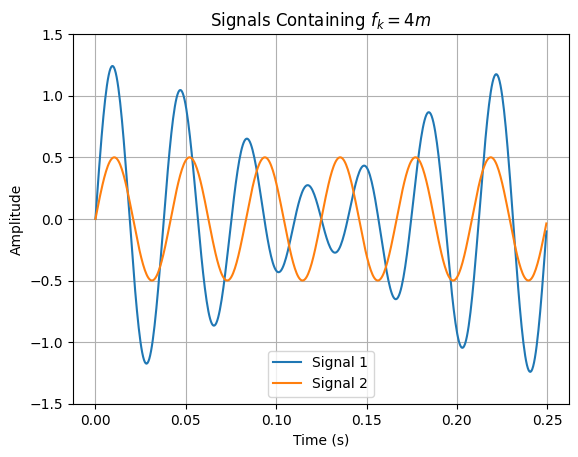

In [31]:
fs = 2048                   # Sampling rate                   
L = 512                     # Number of samples                       
tones1 = [24, 28]           # Frequencies in Hz
amps1 = [0.5, 0.75]         # Tone amplitudes
tones2 = [24]
amps2 = [0.5]
noise_coefficient = 0       # Gaussian noise scale

t = domains.times(fs, L)
s1 = domains.generate_signal(L, tones1, amps1, noise_coefficient, t)
s2 = domains.generate_signal(L, tones2, amps2, noise_coefficient, t)

fig, ax = plotting.plot_time([s1, s2], t, 'Signals Containing $f_k = 4m$', None, (None, (-1.5, 1.5)))
plt.show(ax)


Evidently, these two signals are periodic in $N$, meaning they can tile endlessly without any discontinuity at sample $N - 1$. If instead we tried to tile an $N$ -aperiodic signal, one whose frequency is not an integer multiple of $\frac{f_s}{N}$, then the following behavior occurs.

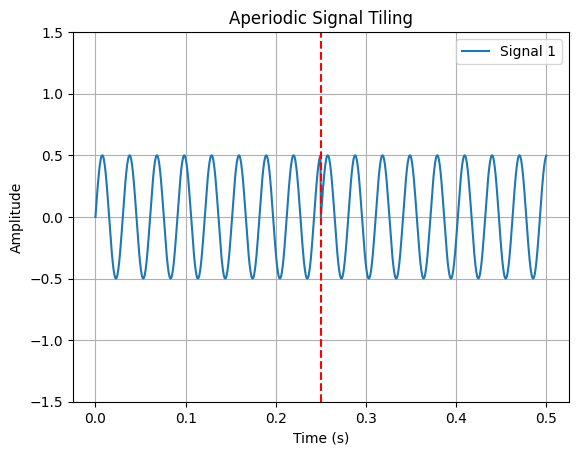

In [37]:
tones3 = [33]
s3 = domains.generate_signal(L, tones3, amps2, noise_coefficient, t)
s3_tiled = np.tile(s3, 2)
t_tiled = np.concatenate([t, np.linspace(L/fs, 2*L /fs, L, endpoint=True)])

fig, ax = plotting.plot_time(s3_tiled, t_tiled, 'Aperiodic Signal Tiling', None, (None, (-1.5, 1.5)))
ax.axvline(L/fs, color='r', linestyle='dashed')
plt.show(ax)

Notice the discontinuity at the tile boundary. 

What this ultimately means is that for a signal containing a misaligned frequency component, as the DFT compares it to the nearest aligned frequency, the signal's time-samples and the DFT's basis samples will never perfectly coincide. The effect of this is a smearing of the data into nearby bins.

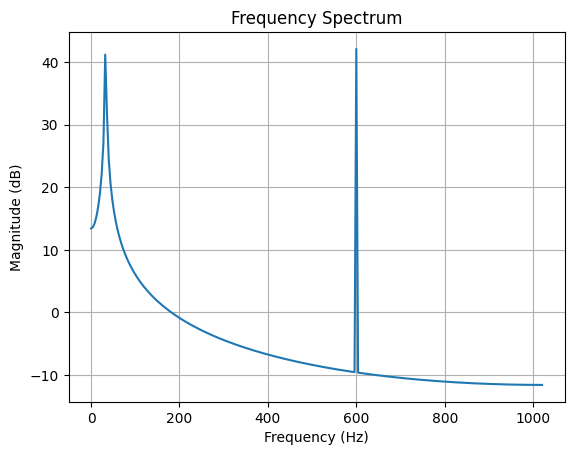

In [40]:
s4 = domains.generate_signal(L, [600], [0.5], 0, t)
s5 = [a + b for (a, b) in zip(s4, s3)]
fig, ax = plotting.plot_spectrum(s5, fs, L, 'fft', None)
plt.show(ax)